### kaggle 집값 예측 문제

columns

- `house_id` - 주택 id변수
- `date` - 판매된 날자
- `location` - 주택 위치
- `type` - 주택 유형 ("2 ROOM", "3 ROOM", "4 ROOM", "5 ROOM", "EXECUTIVE")
- `block` - 주택이 위치한 블록
- `street` - 주택이 위치한 거리
- `storey_range` - 주택이 위치한 층 범위
- `area_sqm	` - 주택의 면적
- `flat_model` - 주택의 모델(구조, 방 배치 등)
- `commence_date` - 주택이 판매에 올라온 날짜
- `price` - 판매 가격 (목표 변수)

additional columns

- `type_num` - 방의 개수
- `area_per_room` - 방 하나당 평균 면적
- `adress` - 주소
- `Year` - 판매 연도
- `Month` - 판매 월
- `time_to_sell` - 판매까지 걸린 연도
- `interest_rate` - 집이 팔린 당시의 금리

delete columns
- `price_per_unitarea` - 단위면적(1m^2)당 가격
- `price_per_room` - 방하나당 평균 가격

다양한 변수를 사용하여 짒값을 예측한다

### 모델링
- pc 리소스 부족으로 모델링을 따로 때어내어 진행

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import  cross_val_score

import seaborn as sns
import gc

### 전처리 데이터 로드

In [2]:
# 전처리 데이터 로드
train = pd.read_pickle('Data/data.pkl')

In [21]:
train

,house_id,type,street,storey_range,area_sqm,flat_model,commence_date,price,type_num,area_per_room,adress,Year,Month,time_to_sell,interest_rate
0,199577,4,26,2,0.325397,3,37,313000.0,1.00,0.085474,5446,6,8,0.086957,0.80
1,217021,2,102,2,0.142857,13,22,167000.0,0.50,0.076923,2699,7,5,0.434783,0.80
2,308062,3,146,3,0.253968,10,10,430000.0,0.75,0.098295,7475,10,8,0.760870,0.00
3,212465,3,333,3,0.253968,10,11,303800.0,0.75,0.098295,986,7,3,0.673913,0.80
4,60654,3,32,1,0.293651,6,32,212000.0,0.75,0.130346,3347,1,9,0.086957,0.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271716,101563,3,407,1,0.297619,6,23,232000.0,0.75,0.133551,4958,3,0,0.326087,0.16
271717,28297,4,50,3,0.420635,6,30,428000.0,1.00,0.147013,5053,0,10,0.108696,1.00
271718,321995,4,215,4,0.357143,3,38,548888.0,1.00,0.105987,1507,11,3,0.173913,0.00
271719,308162,3,243,4,0.246032,8,33,360000.0,0.75,0.091885,2810,10,8,0.260870,0.00


In [3]:
# 데이터 분할
X = train.drop('price', axis = 1)
y = train['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 학습 진행

In [23]:
# 모든 모델들에 대하여 예측을 진행하고 리스트로 저장
y_pred_train_list = []
y_pred_test_list = []
train_mae_list = []
test_mae_list = []
train_r2_list = []
test_r2_list = []

In [22]:
def learning_model(learning_time):
    model = RandomForestRegressor(
        n_estimators= learning_time,
        random_state=42
    )

    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)

    y_pred_train_list.append(y_pred_train)
    y_pred_test_list.append(y_pred_test)

    train_mae_list.append(train_mae)
    test_mae_list.append(test_mae)
    train_r2_list.append(train_r2)
    test_r2_list.append(test_r2)


    print(f'{learning_time} done')

    del model

In [15]:
learning_times = [50, 100, 200, 400, 600, 800, 1000]

In [ ]:
for learning_time in learning_times:
    learning_model(learning_time)

##### 결과확인

- 학습 횟수가 늘수록 test 데이터의 MAE값이 감소하는 경향을 보임

<Figure size 1600x600 with 0 Axes>

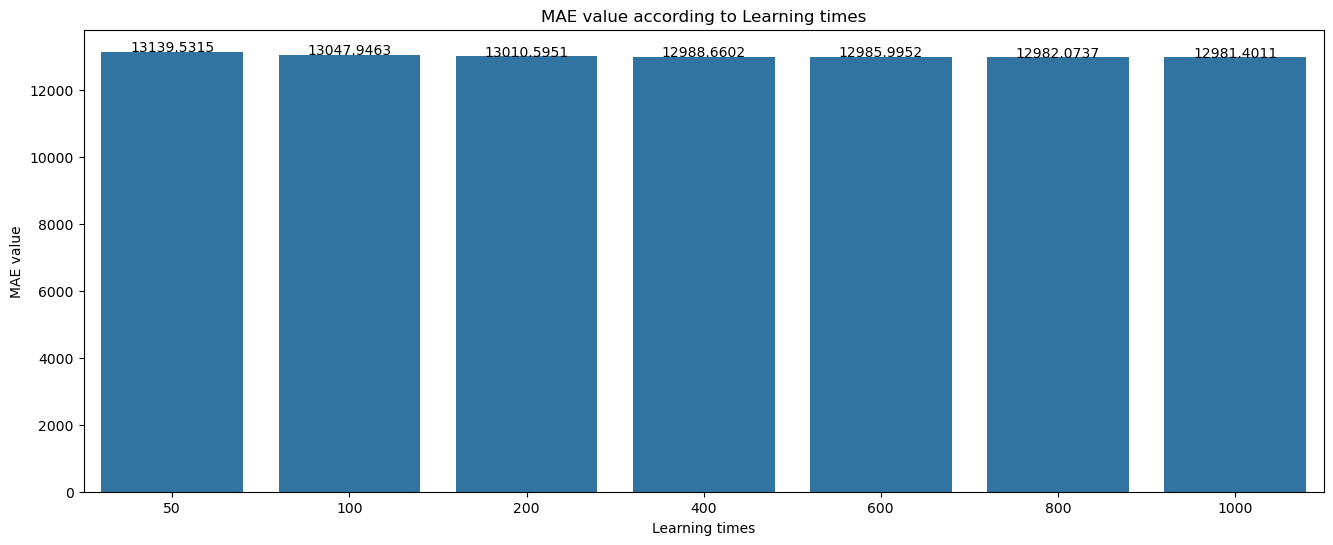

In [17]:
# 각 학습 횟수에 따른 MAE 시각화

plt.figure(figsize=(16, 6))
fig, ax = plt.subplots( figsize=(16,6) )

sns.barplot(x = learning_times, y = test_mae_list)

for p in ax.patches:
    ax.text(p.get_x() + (p.get_width()/2) ,   # 가로 위치
            p.get_y() + p.get_height(),   # 세로 위치
            f"{p.get_height():.4f}",     # 값 + 표시방법 소수 넷째자리까지 
            ha = 'center' )   # 좌우정렬 중간으로

plt.xlabel('Learning times')
plt.ylabel('MAE value')
plt.title('MAE value according to Learning times')
plt.show()

<Figure size 1600x600 with 0 Axes>

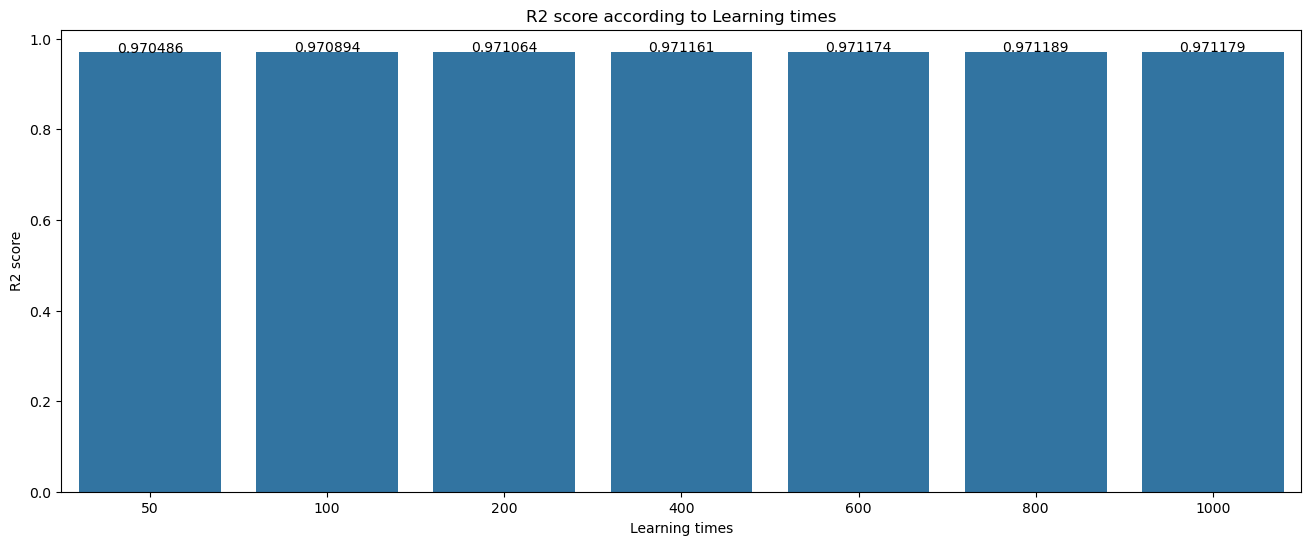

In [16]:
# 각 학습 횟수에 따른 R2 score 시각화

plt.figure(figsize=(16, 6))
fig, ax = plt.subplots( figsize=(16,6) )

sns.barplot(x = learning_times, y = test_r2_list)

for p in ax.patches:
    ax.text(p.get_x() + (p.get_width()/2) ,   # 가로 위치
            p.get_y() + p.get_height(),   # 세로 위치
            f"{p.get_height():.6f}",     # 값 + 표시방법 소수 둘째자리까지 
            ha = 'center' )   # 좌우정렬 중간으로

plt.xlabel('Learning times')
plt.ylabel('R2 score')
plt.title('R2 score according to Learning times')
plt.show()

### 실제 데이터 예측에 사용할 모델 추출

- 위의 경향을 확인할 때 학습 회수 1000회를 기반으로 실제 데이터를 예측

In [4]:
# 1000회 모델 별도로
model = RandomForestRegressor(
        n_estimators= 1000,
        random_state=42
    )

model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

`neg_mean_absolute_error`
- scoring함수를 적용한 방법
- scoring함수는 큰 값일수록 좋은 값으로 인식하는데, MAE는 작은 값일 수록 좋은 값이기에 음수로 출력하는 것

In [29]:
#교차 검증은 pc 성능 문제로 확인에 오류가 있음
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

c:\Users\CHOI Je Woo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
4 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\CHOI Je Woo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\CHOI Je Woo\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 473, in fit
    trees = Parallel(
            ^^^^^^^^^
  File "c:\Users\CHOI Je Woo\anaconda3\Lib\site-packages\sklearn\utils\parallel.py", line 63, in __call__
    return super().__call__(iterable_with_confi

In [28]:
scores

array([-13448.71535389,             nan,             nan,             nan,
                   nan])

In [5]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f'Train MAE: {train_mae}, Train R^2: {train_r2}')
print(f'Test MAE: {test_mae}, Test R^2: {test_r2}')

Train MAE: 4800.692735960915, Train R^2: 0.9960033319097924
Test MAE: 12981.401067680375, Test R^2: 0.9711794014480211
